<a href="https://colab.research.google.com/github/Teenjb/where2meet/blob/machinelearning/Restaurant_Mood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the data into pandas dataframe

In [2]:
import pandas as pd

data = pd.read_excel('/content/drive/MyDrive/Restaurant Mood Resource/restaurant_final_mood.xlsx')

Display label sama dtype

In [3]:
from IPython.display import display

data.head()  # Display the first few rows of the DataFrame
data.info()  # Get information about the DataFrame, such as column names and data types
data.describe()  # Generate descriptive statistics for numerical columns

display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant ID  2170 non-null   object 
 1   Nama           2170 non-null   object 
 2   Location ID    2170 non-null   int64  
 3   Rating         2170 non-null   float64
 4   Jenis          2170 non-null   object 
 5   Harga          1826 non-null   object 
 6   Jumlah Review  2170 non-null   int64  
 7   Lat            2163 non-null   float64
 8   Lang           2163 non-null   float64
 9   Keyword 1      2170 non-null   object 
 10  Keyword 2      2170 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 186.6+ KB


,Restaurant ID,Nama,Location ID,Rating,Jenis,Harga,Jumlah Review,Lat,Lang,Keyword 1,Keyword 2
0,Restaurant_Review-g294229-d25135355-Reviews-W_...,W Super Club Gatsu,25135355,5.0,"[""American"",""Asian""]",NaN,2,-6.202333,106.842380,hungry,focus
1,Restaurant_Review-g294229-d21408694-Reviews-Ha...,Harmoni Square Coffee Shop,21408694,5.0,"[""International"",""Asian""]",$$ - $$$,543,-6.160174,106.819750,fancy,relax
2,Restaurant_Review-g294229-d2170823-Reviews-Tab...,Table8,2170823,5.0,"[""Chinese"",""Asian""]",$$$$,1571,-6.214919,106.797325,jolly,fancy
3,Restaurant_Review-g294229-d4163613-Reviews-PAS...,PASOLA Restaurant,4163613,5.0,"[""Bar"",""European""]",$$ - $$$,957,-6.223649,106.809814,hungry,lively
4,Restaurant_Review-g294229-d1917326-Reviews-La_...,La Brasserie Restaurant,1917326,5.0,"[""European"",""International""]",$$ - $$$,2264,-6.213056,106.818830,gloomy,melancholy
...,...,...,...,...,...,...,...,...,...,...,...
2165,Restaurant_Review-g294229-d10669867-Reviews-Sh...,Shaburi,10669867,4.5,"[""Japanese""]",$$ - $$$,7,-6.255460,106.781700,melancholy,focus
2166,Restaurant_Review-g294229-d25306395-Reviews-Ca...,Cafe Cali,25306395,5.0,"[""Mexican"",""American""]",NaN,2,-6.202333,106.842380,lively,melancholy
2167,Restaurant_Review-g294229-d24887435-Reviews-Ur...,Urban Wagyu Steakhouse (pim),24887435,4.0,"[""Steakhouse""]",NaN,5,-6.267506,106.779180,fancy,romantic
2168,Restaurant_Review-g294229-d12049733-Reviews-Wa...,Wasabi,12049733,4.5,[],$$ - $$$,5,-6.245242,106.799680,focus,jolly


# Preprocessing data

assign 'Missing' as value for null in harga and 0 for null in lat/lang, exclude/drop useless data in predicting, using one hot encoding for keyword

In [4]:
null_columns = data.isnull().any(axis=0)
columns_with_null = ['Lat', 'Lang']
data[columns_with_null] = data[columns_with_null].fillna(0) #Replace Lat Lang Null

new_harga_label = "Missing"
data['Harga'] = data['Harga'].fillna(new_harga_label) #Replace Harga Null


In [5]:
data.to_excel('preprocessed_data.xlsx', index=False) #save preprocessed data as excel
original_preprocessed_data = data.copy() #make a copy of original data frame
important_data = data

one hot encoding

In [6]:
# Create a list of all the unique keywords from 'Keyword 1' and 'Keyword 2' columns
all_keywords = important_data['Keyword 1'].unique().tolist() + important_data['Keyword 2'].unique().tolist()
all_keywords = list(set(all_keywords))  # Remove duplicates from Keyword

# Perform one-hot encoding on 'Keyword 1' and 'Keyword 2' column
keyword1_encoded = pd.get_dummies(important_data['Keyword 1'])
keyword2_encoded = pd.get_dummies(important_data['Keyword 2'])

# Concatenate the encoded features back into the DataFrame
data_encoded = pd.concat([important_data, keyword1_encoded, keyword2_encoded], axis=1)

# Drop the original 'Keyword 1' and 'Keyword 2' columns
data_encoded.drop(columns=['Keyword 1', 'Keyword 2'], axis=1, inplace=True)

display(data_encoded)

,Restaurant ID,Nama,Location ID,Rating,Jenis,Harga,Jumlah Review,Lat,Lang,cozy,...,focus,gloomy,hungry,jolly,lively,melancholy,natural,playful,relax,romantic
0,Restaurant_Review-g294229-d25135355-Reviews-W_...,W Super Club Gatsu,25135355,5.0,"[""American"",""Asian""]",Missing,2,-6.202333,106.842380,0,...,1,0,0,0,0,0,0,0,0,0
1,Restaurant_Review-g294229-d21408694-Reviews-Ha...,Harmoni Square Coffee Shop,21408694,5.0,"[""International"",""Asian""]",$$ - $$$,543,-6.160174,106.819750,0,...,0,0,0,0,0,0,0,0,1,0
2,Restaurant_Review-g294229-d2170823-Reviews-Tab...,Table8,2170823,5.0,"[""Chinese"",""Asian""]",$$$$,1571,-6.214919,106.797325,0,...,0,0,0,0,0,0,0,0,0,0
3,Restaurant_Review-g294229-d4163613-Reviews-PAS...,PASOLA Restaurant,4163613,5.0,"[""Bar"",""European""]",$$ - $$$,957,-6.223649,106.809814,0,...,0,0,0,0,1,0,0,0,0,0
4,Restaurant_Review-g294229-d1917326-Reviews-La_...,La Brasserie Restaurant,1917326,5.0,"[""European"",""International""]",$$ - $$$,2264,-6.213056,106.818830,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,Restaurant_Review-g294229-d10669867-Reviews-Sh...,Shaburi,10669867,4.5,"[""Japanese""]",$$ - $$$,7,-6.255460,106.781700,0,...,1,0,0,0,0,0,0,0,0,0
2166,Restaurant_Review-g294229-d25306395-Reviews-Ca...,Cafe Cali,25306395,5.0,"[""Mexican"",""American""]",Missing,2,-6.202333,106.842380,0,...,0,0,0,0,0,1,0,0,0,0
2167,Restaurant_Review-g294229-d24887435-Reviews-Ur...,Urban Wagyu Steakhouse (pim),24887435,4.0,"[""Steakhouse""]",Missing,5,-6.267506,106.779180,0,...,0,0,0,0,0,0,0,0,0,1
2168,Restaurant_Review-g294229-d12049733-Reviews-Wa...,Wasabi,12049733,4.5,[],$$ - $$$,5,-6.245242,106.799680,0,...,0,0,0,1,0,0,0,0,0,0


ini print label kolom doang biar gw gampang review+copasnya

In [7]:
data_combined=pd.concat([data_encoded[columns].sum(axis=1).rename(columns) if len(data_encoded[columns].shape)==2 else data_encoded[columns] for columns in data_encoded.columns.unique()],axis=1)
print(data_combined)

                                          Restaurant ID  \
0     Restaurant_Review-g294229-d25135355-Reviews-W_...   
1     Restaurant_Review-g294229-d21408694-Reviews-Ha...   
2     Restaurant_Review-g294229-d2170823-Reviews-Tab...   
3     Restaurant_Review-g294229-d4163613-Reviews-PAS...   
4     Restaurant_Review-g294229-d1917326-Reviews-La_...   
...                                                 ...   
2165  Restaurant_Review-g294229-d10669867-Reviews-Sh...   
2166  Restaurant_Review-g294229-d25306395-Reviews-Ca...   
2167  Restaurant_Review-g294229-d24887435-Reviews-Ur...   
2168  Restaurant_Review-g294229-d12049733-Reviews-Wa...   
2169  Restaurant_Review-g294229-d12690006-Reviews-Ne...   

                              Nama  Location ID  Rating  \
0               W Super Club Gatsu     25135355     5.0   
1       Harmoni Square Coffee Shop     21408694     5.0   
2                           Table8      2170823     5.0   
3                PASOLA Restaurant      4163613     5.0

In [8]:
column_labels = data_combined.columns.tolist()
print(column_labels)

['Restaurant ID', 'Nama', 'Location ID', 'Rating', 'Jenis', 'Harga', 'Jumlah Review', 'Lat', 'Lang', 'cozy', 'fancy', 'focus', 'gloomy', 'hungry', 'jolly', 'lively', 'melancholy', 'natural', 'playful', 'relax', 'romantic']


ini pake k mean cluster

In [9]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Split the data into training and testing sets
X_train, X_test = train_test_split(data_combined, test_size=0.2, random_state=42)

# Select the latitude and longitude columns for clustering
coordinates = X_train[['Lat', 'Lang']]

# Perform k-means clustering
k = 5  # Number of clusters
n_init = 10  # Number of times the algorithm will be run
model = KMeans(n_clusters=k, n_init=n_init, random_state=42)
model.fit(coordinates)

coordinates_tf = tf.constant(coordinates.values)

# Assign cluster labels to the training data using .loc[]
X_train.loc[:, 'Cluster'] = model.labels_

# Recommend restaurants for a given latitude, longitude, and keywords
def recommend_restaurants(latitude, longitude, keywords, model, n=10):
    # Create a DataFrame for the query instance
    query_data = pd.DataFrame({
        'Lat': [latitude],
        'Lang': [longitude]
    })

    # Assign cluster label to the query instance
    query_data['Cluster'] = model.predict(query_data[['Lat', 'Lang']])

    # Filter training data based on the same cluster label
    cluster_data = X_train[X_train['Cluster'] == query_data['Cluster'].values[0]].copy()

    # Calculate the similarity score based on matching keywords and weights
    cluster_data['Score'] = cluster_data[keywords].sum(axis=1)

    # Sort by similarity score and select top recommendations
    recommendations = cluster_data.nlargest(n, 'Score')

    return recommendations[['Nama', 'Location ID', 'Jenis', 'Rating', 'Harga', 'Jumlah Review', 'Lat', 'Lang']]

# Example usage (testing)
latitude = -6.202330
longitude = 106.84230
keywords = ['hungry', 'relax', 'hungry', 'focus', 'focus']
recommended_restaurants = recommend_restaurants(latitude, longitude, keywords, model)
print(recommended_restaurants)


                    Nama  Location ID                           Jenis  Rating  \
1866      Domino's Pizza     12105739                              []     4.0   
405             Koi Cafe     12275581                        ["Cafe"]     4.0   
1333  W Super Club Gatsu     25135355            ["American","Asian"]     5.0   
1937       Sushi Ippachi      7050156            ["Japanese","Sushi"]     4.0   
500   Le Chocolat Lounge      7206850                        ["Cafe"]     4.5   
1457  W Super Club Gatsu     25135355            ["American","Asian"]     5.0   
0     W Super Club Gatsu     25135355            ["American","Asian"]     5.0   
82    KITA 喜多 Restaurant     24187587                    ["Japanese"]     5.0   
1731           JP Bistro      4610204  ["Indonesian","International"]     3.5   
476       Greyhound Cafe     12902054         ["Southwestern","Thai"]     4.0   

         Harga  Jumlah Review       Lat       Lang  
1866         $              9 -6.160990  106.83238  
40

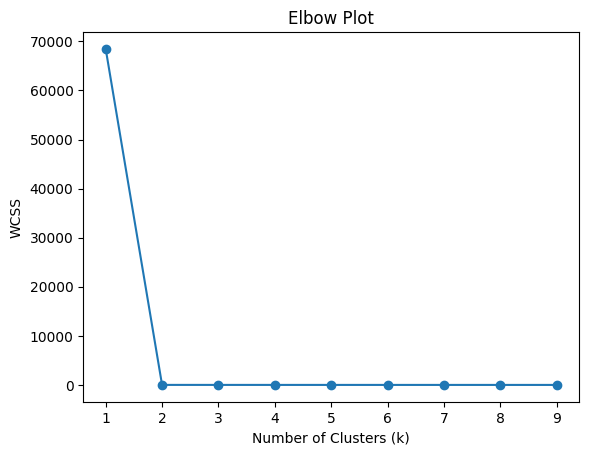

In [10]:
import matplotlib.pyplot as plt

k_values = range(1, 10)
wcss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(coordinates)
    wcss = kmeans.inertia_
    wcss_values.append(wcss)

# Plot the elbow plot
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()
